#Matplotlib and geopandas attempt

In [ ]:
import sys
'geopandas' in sys.modules
!pip install geopandas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
# Load your map data into a GeoDataFrame
italy = gpd.read_file('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.shp')
new_regions = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.csv')
ATECO = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')
italy['NOME_REG'] = new_regions['NOME_REG']
italy['NOME_REG'] = [s.replace("-","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace(" ","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Aosta","ValledAosta") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Trentino","TrentinoAltoAdige") for s in italy['NOME_REG']]

map = italy.merge(ATECO.iloc[:,[1,2]], on = 'NOME_REG', how = 'right')

fig, ax = plt.subplots(1, figsize=(10, 10))
col = map.columns[5]

ax.set_title(col, fontdict={'fontsize':'15', 'fontweight':'5'}, color='Black', fontfamily='sans-serif', loc = 'center')
map.plot(ax=ax, column=col, cmap='OrRd', categorical=False, linewidth=0.5, edgecolor='black')
# remove the axes
ax.set_axis_off()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

italy = gpd.read_file('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.shp')
new_regions = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.csv')
ATECO = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')
italy['NOME_REG'] = new_regions['NOME_REG']
italy['NOME_REG'] = [s.replace("-","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace(" ","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Aosta","ValledAosta") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Trentino","TrentinoAltoAdige") for s in italy['NOME_REG']]

map = italy.merge(ATECO.iloc[:,[1,2]], on = 'NOME_REG', how = 'right')

fig, ax = plt.subplots(figsize=(16, 9), dpi=100)
col = map.columns[5]

ax.set_title(col, fontdict={'fontsize':'15', 'fontweight':'5'}, color='Black', fontfamily='sans-serif', loc = 'center')
map.plot(ax=ax, column=col, cmap='OrRd', categorical=False, linewidth=0.5, edgecolor='black')

# remove the axes
ax.set_axis_off()

# Create bar chart data (replace with your own data)
x = ['A', 'B', 'C', 'D', 'E']
y = [10, 15, 20, 25, 30]
y = [1/2*val for val in y]

import io
from PIL import Image

# your previous code here

fig, ax = plt.subplots(1, figsize=(200, 200))
col = map.columns[5]

ax.set_title(col, fontdict={'fontsize':'15', 'fontweight':'5'}, color='Black', fontfamily='sans-serif', loc = 'center')
map.plot(ax=ax, column=col, cmap='OrRd', categorical=False, linewidth=0.5, edgecolor='black')

# remove the axes
ax.set_axis_off()

# Create bar chart data (replace with your own data)
x = ['A', 'B', 'C', 'D', 'E']
y = [10, 15, 20, 25, 30]

# Loop over each region and create bar chart
for idx, row in map.iterrows():
    # Get region name and centroid coordinates
    region = row['NOME_REG']
    centroid_x, centroid_y = row['geometry'].centroid.coords[0]

    # Create bar chart
    ax.bar(x, y, width=0.0005, alpha=0.7)
    ax.set_title(region, fontsize=12)

    # Set size and position of bar chart
    bbox = ax.get_tightbbox(fig.canvas.get_renderer())
    bar_width = bbox.width / fig.dpi
    bar_height = bbox.height / fig.dpi
    ax.set_position([centroid_x - bar_width/2, centroid_y - bar_height/2, bar_width, bar_height])

    # Redraw the figure
    fig.canvas.draw()

    # Add bar chart to map using annotation function
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(int(bbox.height), int(bbox.width), 3)

    # Convert the image array to a PIL image object
    image = Image.fromarray(image)
    image = image.resize((int(bbox.width), int(bbox.height)))
    image = np.array(image)



    # Set the alpha channel to 255 (fully opaque)
    image = np.dstack((image, np.full((image.shape[0], image.shape[1]), 255)))

    # Update the plot with the resized image
    ax_image = ax.imshow(image, extent=[centroid_x - bar_width/2, centroid_x + bar_width/2, centroid_y - bar_height/2, centroid_y + bar_height/2], zorder=3, alpha=0.8)

    # Clear the axis for the next iteration
    ax.clear()
    map.plot(ax=ax, column=col, cmap='OrRd', categorical=False, linewidth=0.5, edgecolor='black')
    ax.set_axis_off()

plt.show()

#Cesium attempt

##Cesium with .shp

In [ ]:
import sys
'geopandas' in sys.modules
!pip install geopandas
import geopandas as gpd
from IPython.core.display import HTML

In [ ]:
import requests

# Read the shapefile into a GeoDataFrame
italy = gpd.read_file('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.shp')
new_regions = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.csv')
ATECO = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')
italy['NOME_REG'] = new_regions['NOME_REG']
italy['NOME_REG'] = [s.replace("-","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace(" ","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Aosta","ValledAosta") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Trentino","TrentinoAltoAdige") for s in italy['NOME_REG']]

italy_map = italy.merge(ATECO.iloc[:,[1,2]], on = 'NOME_REG', how = 'right')
fig, ax = plt.subplots(1, figsize=(10, 10))
col = map.columns[5]

ax.set_title(col, fontdict={'fontsize':'15', 'fontweight':'5'}, color='Black', fontfamily='sans-serif', loc = 'center')
italy_map.plot(ax=ax, column=col, cmap='OrRd', categorical=False, linewidth=0.5, edgecolor='black')
# remove the axes
ax.set_axis_off()

# Convert the GeoDataFrame to GeoJSON format
geojson = italy_map.to_crs(epsg='4326').to_json()


# Define the URL to the GeoJSON file
url = 'https://example.com/italy_map.geojson'

# Send a request to get the GeoJSON data from the URL
response = requests.get(url)

# Extract the GeoJSON data from the response
geojson = response.json()


# Define the JavaScript code to create the Cesium viewer and save the output as an HTML file
js_code = f'''
    <script src="https://cesium.com/downloads/cesiumjs/releases/1.85/Build/Cesium/Cesium.js"></script>
    <link rel="stylesheet" href="https://cesium.com/downloads/cesiumjs/releases/1.85/Build/Cesium/Widgets/widgets.css">
    <div id="cesiumContainer" style="height: 600px"></div>
    <script>
        var viewer = new Cesium.Viewer("cesiumContainer");
        viewer.dataSources.add(Cesium.GeoJsonDataSource.load({geojson}));
        viewer.zoomTo(viewer.dataSources.get(0));
        var promise = viewer.imageryLayers.addImageryProvider(
          new Cesium.SingleTileImageryProvider({
              url: canvas.toDataURL(),
              rectangle: Cesium.Rectangle.fromDegrees(
                  {map.total_bounds[0]},
                  {map.total_bounds[1]},
                  {map.total_bounds[2]},
                  {map.total_bounds[3]}
              )
          })
        );
        Cesium.when(promise, function (layer) {{
            viewer.zoomTo(layer);
        }});

        var options = {
            clampToGround : true
        };
        var promise = Cesium.GeoJsonDataSource.load({geojson}, options);
        Cesium.when(promise, function(dataSource) {{
            viewer.dataSources.add(dataSource);
            viewer.zoomTo(dataSource);
        }});
        
        var canvas = viewer.scene.canvas;
        canvas.toBlob(function(blob) {{
          var link = document.createElement("a");
          link.download = "map.png";
          link.href = URL.createObjectURL(blob);
          link.click();
        }});
    </script>
'''

# Save the output as an HTML file
with open('cesium_map.html', 'w') as f:
    f.write(js_code)

##Cesium with .json

In [ ]:
!pip install Cesium
import cesium
from cesium import Entity, BillboardGraphics, ChartGraphics

# Create a Cesium Viewer and add a GeoJSON data source
viewer = cesium.Viewer()
geojson_data_source = viewer.dataSources.add(Cesium.GeoJsonDataSource())

# Create an entity for a province
entity = Entity(name='Province Name', polygon=geojson_data_source.entities[0].polygon)

# Create a billboard for the entity
billboard = BillboardGraphics(image='path/to/image.png', scale=0.1)

# Create a chart for the billboard
chart = ChartGraphics(width=200, height=100, data=data)

# Attach the billboard to the entity
billboard.id = 'billboard_id'
billboard.chart = chart
entity.billboard = billboard

# Add the entity to the viewer
viewer.entities.add(entity)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 673.9/673.9 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.5/554.5 KB 42.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43818 sha256=e4d5ca04171e59ed12946ff9933615d5d40d59ea1f53fd86df9ff5043b56a718
  Stored in directory: /root/.cache/pip/wheels/13/7e/da/8944bc12def4de5f19b70d9c35634f78cbe6640907ff2e71ba
Successfully built gatspy


ImportError: ignored

#mplleaflet

In [ ]:
!pip install mplleaflet
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet

In [ ]:

# Load your map data into a GeoDataFrame
italy = gpd.read_file('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.shp')
new_regions = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.csv')
ATECO = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')
italy['NOME_REG'] = new_regions['NOME_REG']
italy['NOME_REG'] = [s.replace("-","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace(" ","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Aosta","ValledAosta") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Trentino","TrentinoAltoAdige") for s in italy['NOME_REG']]

map = italy.merge(ATECO.iloc[:,[1,2]], on = 'NOME_REG', how = 'right')

# Create a bar chart of the data
bar_data = ATECO.iloc[:,[1,3]]
bar_data.columns = ['NOME_REG', 'Totale industria']
bar_data['NOME_REG'] = [s.replace("Aosta","ValledAosta") for s in bar_data['NOME_REG']]
bar_data['NOME_REG'] = [s.replace("Trentino","TrentinoAltoAdige") for s in bar_data['NOME_REG']]
bar_data['NOME_REG'] = [s.replace("-","") for s in bar_data['NOME_REG']]
bar_data['NOME_REG'] = [s.replace(" ","") for s in bar_data['NOME_REG']]
bar_data = bar_data.groupby('NOME_REG').sum().reset_index()
bar_data = map.merge(bar_data, on='NOME_REG', how='left')

# Create a Matplotlib bar chart of the data
fig, ax = plt.subplots()
bar_data.plot(x='NOME_REG', y='Totale industria', kind='bar', ax=ax)

# Convert the Matplotlib plot to an interactive Leaflet web map
mplleaflet.display(fig=fig, tiles='cartodb_positron')


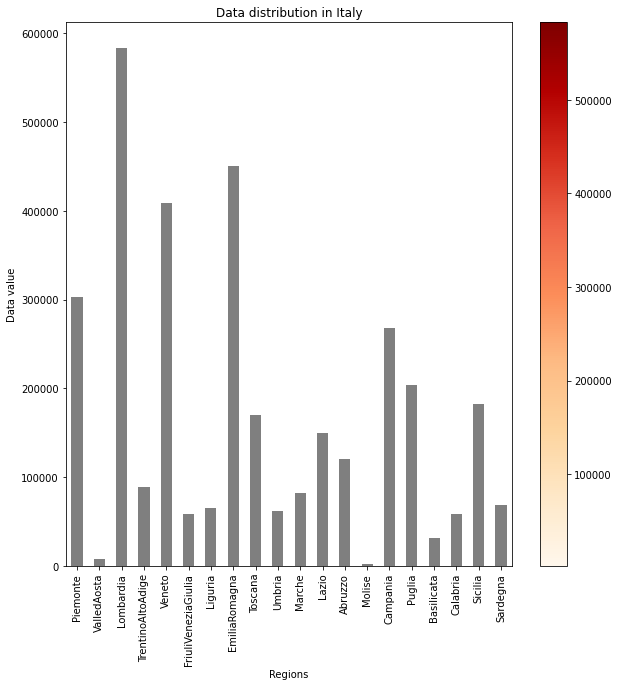

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from descartes import PolygonPatch

italy = gpd.read_file('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.shp')
new_regions = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.csv')
ATECO = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')
italy['NOME_REG'] = new_regions['NOME_REG']
italy['NOME_REG'] = [s.replace("-","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace(" ","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Aosta","ValledAosta") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Trentino","TrentinoAltoAdige") for s in italy['NOME_REG']]

# Load your data into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')

# Merge the GeoDataFrame with your data
merged = italy.merge(data, on='NOME_REG')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame
# merged.plot(column='ATECO 10,11 [t]', cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='white')

# Add the bar graph
merged.plot(kind='bar', x='NOME_REG', y='ATECO 10,11 [t]', ax=ax, color='black', alpha=0.5, width=0.5, legend=False)

# Add labels and title
ax.set_title('Data distribution in Italy')
ax.set_xlabel('Regions')
ax.set_ylabel('Data value')

# Add legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=merged['ATECO 10,11 [t]'].min(), vmax=merged['ATECO 10,11 [t]'].max()))
sm._A = []
cbar = plt.colorbar(sm)

# Show the plot
plt.show()

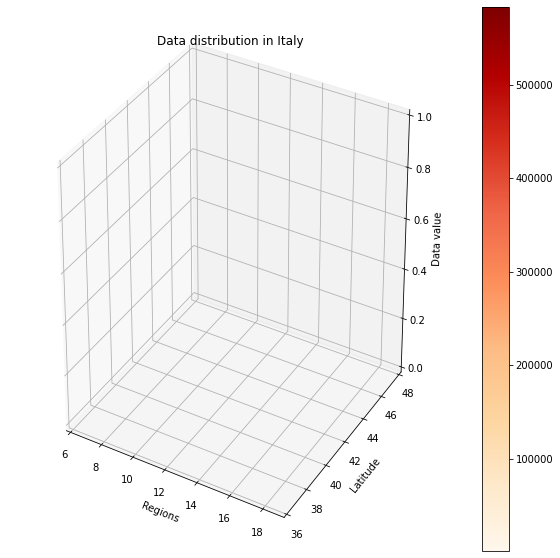

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Load the shapefile for Italy
italy = gpd.read_file('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.shp')
new_regions = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.csv')
ATECO = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')
italy['NOME_REG'] = new_regions['NOME_REG']
italy['NOME_REG'] = [s.replace("-","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace(" ","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Aosta","ValledAosta") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Trentino","TrentinoAltoAdige") for s in italy['NOME_REG']]

# Load your data into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')

# Merge the GeoDataFrame with your data
merged = italy.merge(data, on='NOME_REG')

# Create the 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Set the x- and y-axis limits
ax.set_xlim(6, 19)
ax.set_ylim(36, 48)

# Create the 3D polygons for each region
for i, row in merged.iterrows():
    x, y = row.geometry.exterior.coords.xy
    z = np.zeros(len(x))
    ax.add_collection(Poly3DCollection([list(zip(x, y, z))], facecolor=plt.cm.OrRd(row['ATECO 10,11 [t]']), edgecolor='k'))

# Set the z-axis value for the bars
z = merged['ATECO 10,11 [t]']

# Create the 3D bars for each region
for i, row in merged.iterrows():
    x = i + 1
    y = row.geometry.centroid.y
    dx = 1
    dy = 1
    dz = row['ATECO 10,11 [t]']
    ax.bar3d(x, y, z[i], dx, dy, dz, color=plt.cm.OrRd(row['ATECO 10,11 [t]']), alpha=0.8, edgecolor='k')

# Add labels and title
ax.set_title('Data distribution in Italy')
ax.set_xlabel('Regions')
ax.set_ylabel('Latitude')
ax.set_zlabel('Data value')

# Add legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=merged['ATECO 10,11 [t]'].min(), vmax=merged['ATECO 10,11 [t]'].max()))
sm._A = []
cbar = plt.colorbar(sm)

# Show the plot
plt.show()

AttributeError: ignored

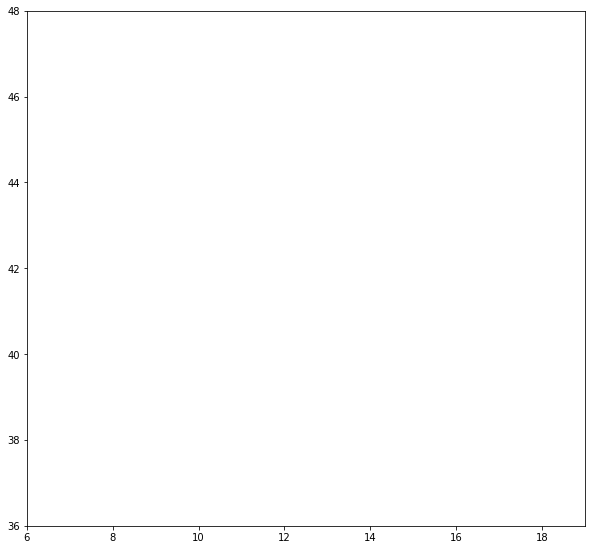

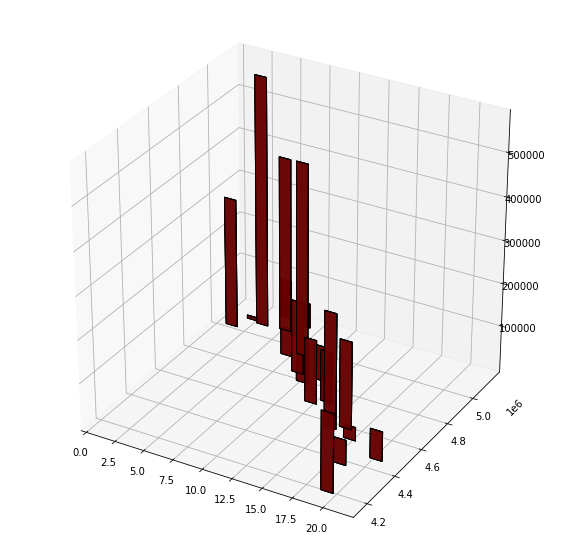

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# !pip list matplotlib

# Load the shapefile for Italy
italy = gpd.read_file('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.shp')
new_regions = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.csv')
ATECO = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')
italy['NOME_REG'] = new_regions['NOME_REG']
italy['NOME_REG'] = [s.replace("-","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace(" ","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Aosta","ValledAosta") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Trentino","TrentinoAltoAdige") for s in italy['NOME_REG']]

# Load your data into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')

# Merge the GeoDataFrame with your data
merged = italy.merge(data, on='NOME_REG')

# Create the 2D plot for the map
fig, ax = plt.subplots(figsize=(10, 10))
merged.plot(ax=ax, column='ATECO 10,11 [t]', cmap='OrRd', edgecolor='k', linewidth=0.5)

# Set the x- and y-axis limits
ax.set_xlim(6, 19)
ax.set_ylim(36, 48)

# Create the 3D plot for the bars
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Set the z-axis limits
ax.set_zlim(merged['ATECO 10,11 [t]'].min(), merged['ATECO 10,11 [t]'].max())
ax.set_zlim
# Create the 3D bars for each region
for i, row in merged.iterrows():
    x = i + 1
    y = row.geometry.centroid.y
    dx = 1
    dy = 1
    dz = row['ATECO 10,11 [t]']
    ax.bar3d(x, y, 0, dx, dy, dz, color=plt.cm.OrRd(row['ATECO 10,11 [t]']), alpha=0.8, edgecolor='k')

# Set the aspect ratio of the 3D plot to match the aspect ratio of the 2D plot
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
z0, z1 = ax.get_zlim()
ax.set_box_aspect([(x1-x0), (y1-y0), (z1-z0)])

# Add labels and title
ax.set_title('Data distribution in Italy')
ax.set_xlabel('Regions')
ax.set_ylabel('Latitude')
ax.set_zlabel('Data value')

# Add legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=merged['ATECO 10,11 [t]'].min(), vmax=merged['ATECO 10,11 [t]'].max()))
sm._A = []
cbar = plt.colorbar(sm)

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import set_box_aspect

italy = gpd.read_file('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.shp')
new_regions = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.csv')
ATECO = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')
italy['NOME_REG'] = new_regions['NOME_REG']
italy['NOME_REG'] = [s.replace("-","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace(" ","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Aosta","ValledAosta") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Trentino","TrentinoAltoAdige") for s in italy['NOME_REG']]

# Load your data into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')

# Merge the GeoDataFrame with your data
merged = italy.merge(data, on='NOME_REG')

# Create the 2D plot for the map
fig, ax = plt.subplots(figsize=(10, 10))
merged.plot(ax=ax, column='ATECO 10,11 [t]', cmap='OrRd', edgecolor='k', linewidth=0.5)

# Set the x- and y-axis limits
ax.set_xlim(6, 19)
ax.set_ylim(36, 48)

# Create the 3D plot for the bars
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Set the z-axis limits
ax.set_zlim(merged['ATECO 10,11 [t]'].min(), merged['ATECO 10,11 [t]'].max())

# Create the 3D bars for each region
for i, row in merged.iterrows():
    x = i + 1
    y = row.geometry.centroid.y
    dx = 1
    dy = 1
    dz = row['ATECO 10,11 [t]']
    ax.bar3d(x, y, 0, dx, dy, dz, color=plt.cm.OrRd(row['ATECO 10,11 [t]']), alpha=0.8, edgecolor='k')

# Set the aspect ratio of the 3D plot to match the aspect ratio of the 2D plot
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
z0, z1 = ax.get_zlim()
set_box_aspect((x1-x0, y1-y0, z1-z0), ax=ax)

# Add labels and title
ax.set_title('Data distribution in Italy')
ax.set_xlabel('Regions')
ax.set_ylabel('Latitude')
ax.set_zlabel('Data value')

# Add legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=merged['ATECO 10,11 [t]'].min(), vmax=merged['ATECO 10,11 [t]'].max()))
sm._A = []
cbar = plt.colorbar(sm)

# Show the plot
plt.show()

ImportError: ignored

#Mix of attempts

In [ ]:
import pandas as pd
import sys
'geopandas' in sys.modules
!pip install geopandas
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from descartes import PolygonPatch
# !pip list matplotlib

In [ ]:
# Load the shapefile for Italy
italy = gpd.read_file('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.shp')
new_regions = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.csv')
ATECO = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')
italy['NOME_REG'] = new_regions['NOME_REG']
italy['NOME_REG'] = [s.replace("-","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace(" ","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Aosta","ValledAosta") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Trentino","TrentinoAltoAdige") for s in italy['NOME_REG']]

# Load your data into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')

# Merge the GeoDataFrame with your data
merged = italy.merge(data, on='NOME_REG')

# Create the 2D plot for the map
fig, ax = plt.subplots(figsize=(10, 10))
#col = merged.columns[6]
merged.plot(ax=ax, column='ATECO 10,11 [t]', cmap='OrRd', edgecolor='k', linewidth=0.5)

# Set the x- and y-axis limits
# ax.set_xlim(6, 19)
# ax.set_ylim(36, 48)

# Create the 3D plot for the bars
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Set the z-axis limits
ax.set_zlim(merged['ATECO 10,11 [t]'].min(), merged['ATECO 10,11 [t]'].max())

#Create the 3D bars for each region
for i, row in merged.iterrows():
    x = i + 1
    y = row.geometry.centroid.y
    dx = 1
    dy = 1
    dz = row['ATECO 10,11 [t]']
    ax.bar3d(x, y, 0, dx, dy, dz, color=plt.cm.OrRd(row['ATECO 10,11 [t]']), alpha=0.8, edgecolor='k')

# Set the aspect ratio of the 3D plot to match the aspect ratio of the 2D plot
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
z0, z1 = ax.get_zlim()
# ax.set_box_aspect([(x1-x0), (y1-y0), (z1-z0)])
ax.set_aspect('auto')

# Add labels and title
ax.set_title('Data distribution in Italy')
ax.set_xlabel('Regions')
ax.set_ylabel('Latitude')
ax.set_zlabel('Data value')

# Add legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=merged['ATECO 10,11 [t]'].min(), vmax=merged['ATECO 10,11 [t]'].max()))
sm._A = []
cbar = plt.colorbar(sm)

# # Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import geopandas as gpd

# Load the shapefile for Italy
italy = gpd.read_file('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.shp')
new_regions = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.csv')
ATECO = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')
italy['NOME_REG'] = new_regions['NOME_REG']
italy['NOME_REG'] = [s.replace("-","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace(" ","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Aosta","ValledAosta") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Trentino","TrentinoAltoAdige") for s in italy['NOME_REG']]

# Load your data into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')

# Merge the GeoDataFrame with your data
merged = italy.merge(data, on='NOME_REG')

# Create the 2D plot for the map
fig, ax = plt.subplots(figsize=(10, 10))
merged.plot(ax=ax, column='ATECO 10,11 [t]', cmap='OrRd', edgecolor='k', linewidth=0.5)

# Create the 3D plot for the bars
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Set the z-axis limits
ax.set_zlim(merged['ATECO 10,11 [t]'].min(), merged['ATECO 10,11 [t]'].max())

# Create the 3D bars for each region
for i, row in merged.iterrows():
    x = row.geometry.centroid.x
    y = row.geometry.centroid.y
    dz = row['ATECO 10,11 [t]']
    if row.geometry.type == 'Polygon':
        xy = row.geometry.exterior.coords.xy
        ax.bar3d(x, y, 0, 0.01, 0.01, dz, color=plt.cm.OrRd(row['ATECO 10,11 [t]']), alpha=0.8, edgecolor='k')
    elif row.geometry.type == 'MultiPolygon':
        for polygon in row.geometry.geoms:
            xy = polygon.exterior.coords.xy
            ax.bar3d(x, y, 0, 0.01, 0.01, dz, color=plt.cm.OrRd(row['ATECO 10,11 [t]']), alpha=0.8, edgecolor='k')

# # Set the aspect ratio of the 3D plot to match the aspect ratio of the 2D plot
# x0, x1 = ax.get_xlim()
# y0, y1 = ax.get_ylim()
# z0, z1 = ax.get_zlim()
# ax.set_box_aspect([(x1-x0), (y1-y0), (z1-z0)])


# Add labels and title
ax.set_title('Data distribution in Italy')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Data value')
ax.set_axis_off()

# # Add legend
# sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=merged['ATECO 10,11 [t]'].min(), vmax=merged['ATECO 10,11 [t]'].max()))
# sm._A = []
# cbar = plt.colorbar(sm)

# Show the plot
plt.show()



In [ ]:
!pip install cesiumpy

In [ ]:
!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [ ]:
import cesiumpy
import geopandas as gpd
import pandas as pd
import numpy as np

# Load map data from shapefile
italy = gpd.read_file('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.shp')
new_regions = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Graphs/20200428_Covid-19_Italy_Map/reg2011_g.csv')
ATECO = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')
italy['NOME_REG'] = new_regions['NOME_REG']
italy['NOME_REG'] = [s.replace("-","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace(" ","") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Aosta","ValledAosta") for s in italy['NOME_REG']]
italy['NOME_REG'] = [s.replace("Trentino","TrentinoAltoAdige") for s in italy['NOME_REG']]

# Load data for the bar chart (replace with your own data)
data = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste Production per Region/Food Waste per ATECO.csv')

# Define the cesiumpy viewer
viewer = cesiumpy.Viewer()

# Add the map data to the viewer
geojson_data = italy.to_crs(epsg='4326').to_json()
geojson_source = cesiumpy.GeoJsonDataSource(geojson_data)
viewer.dataSources.add(geojson_source)

# # Define the height of the bars
# bar_heights = data['ATECO 10,11 [t]'].values

# # Define the x, y, and z coordinates for each bar
# x_coords = italy.geometry.centroid.x
# y_coords = italy.geometry.centroid.y
# z_coords = np.zeros(len(italy))
# positions = np.array([x_coords, y_coords, z_coords]).T

# # Define the size and color of each bar
# bar_size = np.ones(len(italy)) * 10000
# bar_color = cesiumpy.Color.from_alpha(cesiumpy.Color.RED, alpha=0.5)

# # Create the entity for the bar chart
# bar_entity = cesiumpy.Entity(
#     name='Bar Chart',
#     position=positions,
#     cylinder={
#         'length': bar_heights,
#         'topRadius': bar_size,
#         'bottomRadius': bar_size,
#         'material': bar_color
#     }
# )

# # Add the entity to the viewer
# viewer.entities.add(bar_entity)

# Display the plot
viewer


In [ ]:
!pip install pydeck

In [ ]:
!pip install pydeck
import pydeck as pdk
from urllib.request import urlopen
import json
import pandas as pd
from shapely.geometry import shape
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.pyplot as plt

# load massachusetts zip geo json
with urlopen('https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/ma_massachusetts_zip_codes_geo.min.json') as response:
    state_geo = json.load(response)

# load data with zip to population mapping
df = pd.read_csv('https://raw.githubusercontent.com/einblick-ai/data/main/mass-zip-population.csv')
df['zip'] = df['zip'].astype(str).str.pad(width=5, side='left', fillchar='0')

# compute centroids of each zip code 
features = state_geo["features"]
centroids = {}
for feature in features:
    s = shape(feature["geometry"])
    centroids[feature['properties']['ZCTA5CE10']] = s.centroid

# map centroid to zip code in the df
df["zip_lat"] = 0
df["zip_lon"] = 0
for index, row in df.iterrows():
    if row["zip"] in centroids:
        df.loc[index, 'zip_lat'] = centroids[row["zip"]].y
        df.loc[index, 'zip_lon'] = centroids[row["zip"]].x

# setup default view box 
view = pdk.data_utils.compute_view(df[["zip_lon", "zip_lat"]])
view.pitch = 75

# create mapping from population to color
plasma = cm = plt.get_cmap('plasma') 
cNorm  = colors.Normalize(vmin=df["population"].min(), vmax=df["population"].max())
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plasma)
df["color"] = df.apply (lambda row: scalarMap.to_rgba(row["population"]), axis=1)

# create column layer in pydeck
column_layer = pdk.Layer(
    "ColumnLayer",
    data=df,
    get_position=["zip_lon", "zip_lat"],
    get_elevation="population",
    elevation_scale=1,
    radius=300,
    pickable=True,
    get_fill_color="[color[0] * 255, color[1] * 255, color[2] * 255, color[3] * 255]",
    auto_highlight=True,
)

# add tooltip 
tooltip = {
    "html": "<b>{population}</b> people in {zip}",
    "style": {"background": "grey", "color": "white", "font-family": '"Helvetica Neue", Arial', "z-index": "10000"},
}

r = pdk.Deck(
    column_layer,
    initial_view_state=view,
    tooltip=tooltip
)

r.to_html("column_layer.html", notebook_display=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<IPython.core.display.Javascript object>

In [ ]:
df.population

0       7360
1      29465
2      22229
3       4049
4       1038
       ...  
530       10
531      334
532      118
533       78
534       18
Name: population, Length: 535, dtype: int64